# MRF modelling for image segmentation - Circles

In [1]:
import os
import scipy
import skimage
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.join('..', '..'))
import toolbox
from imp import reload
reload(toolbox)

<module 'toolbox' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week5/../../toolbox/__init__.py'>

In [2]:
im = skimage.io.imread(os.path.join('data', 'noisy_circles.png')).astype(np.float)

/var/folders/bb/6zx8vn690fd_kml8spjg6j8h0000gn/T/ipykernel_60132/990879119.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = skimage.io.imread(os.path.join('data', 'noisy_circles.png')).astype(np.float)


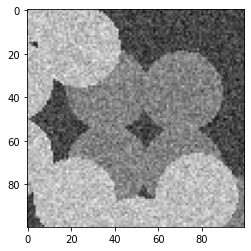

In [7]:
# visualizattion
fig, ax = plt.subplots()
ax.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)

In [3]:
segmentations = [] # list where I'll place different segmentations
GT = skimage.io.imread(os.path.join('data', 'noise_free_circles.png')) # ground truth image

In [4]:
(mu, S_gt) = np.unique(GT, return_inverse=True)
S_gt = S_gt.reshape(im.shape)

In [5]:
segmentations += [S_gt]

# finding some configurations (segmentations) using conventional methods
S_t = np.zeros(im.shape, dtype=int) + (im>100) + (im>160) # thresholded
segmentations += [S_t]

D_s = scipy.ndimage.gaussian_filter(im, sigma=1, truncate=3, mode='nearest')
S_g = np.zeros(im.shape, dtype=int) + (D_s>100) + (D_s>160) # thresholded
segmentations += [S_g]

D_m = scipy.ndimage.median_filter(im, size=(5,5), mode='reflect');
S_t = np.zeros(im.shape, dtype=int) + (D_m>100) + (D_m>160) # thresholded
segmentations += [S_t]

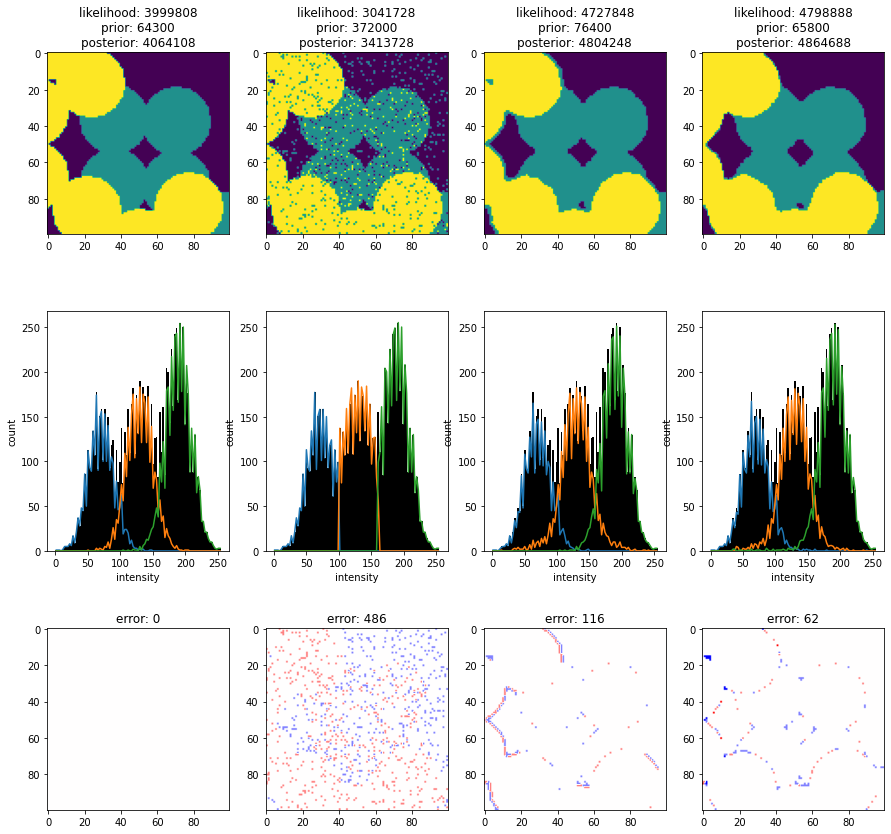

In [9]:
N = len(segmentations)
fig, ax = plt.subplots(3,N, figsize=(15, 15))
beta = 100

for i in range(N):
    ax[0][i].imshow(segmentations[i])
    V1, V2 = toolbox.segmentation.segmentation_energy(segmentations[i], im, mu, beta)
    ax[0][i].set_title(f'likelihood: {int(V1)}\nprior: {V2}\nposterior: {int(V1+V2)}')
    
    toolbox.segmentation.segmentation_histogram(ax[1][i], im, segmentations[i])
    ax[1][i].set_xlabel('intensity')
    ax[1][i].set_ylabel('count')
    
    err = S_gt - segmentations[i]
    ax[2][i].imshow(err, vmin=-2, vmax=2, cmap=plt.cm.bwr)
    ax[2][i].set_title(f'error: {(err>0).sum()}')
